# Geospatial Analysis I (Vector Operations)

In the last section we have seen various techniques for visualizing spatial data. These methods are really indispensable for understanding both quantitative and qualitative trends in data. But the **real power of spatial data** is when it can be **related to other spatial data sources**, and GIS helps to achieve this goal. 

In this section we look at various techniques for searching, querying, and combining spatial data.

First we will look at selection

## Selection

### Selection by Attribute

This is basically a non-spatial selection strategy where we will use the attributes (columns) for selecting subsets of spatial data.

Let's look at an example. For this example we will use the hospital records dataset. 

1. Download the hospital records dataset from https://cwru.box.com/s/av0xuueq98usufwbljl36id96k3m1qwh

2. Load it to QGIS (its a CSV file and use the latitude and longitude fields for converting it to a spatial layer)

![vector1](images/vector1.png)

It has hospitals from all around US and hence have realtively high number of records

3. Lets select all the hospitals from Ohio. (We can use the STATE attribute)

Open the attribute table. Click on select features using an expression

![vector2](images/vector2.png)

Select the fields and values drop down and click on the option STATE

![vector3](images/vector3.png)

On the query window add "STATE" = 'OH'

![vector4](images/vector4.png)

Click on the "Select Features" and click on close.

If you now check the attribute table you can see that 2957 records are selected

![vector5](images/vector5.png)

And if you check the map, the hospitals from Ohio will be highlighted in Ohio. 

![vector6](images/vector6.png)

4. Let's select all hospitals from Ohio that has a helipad

Here we will use the AND operator to combine two filter statements.

![vector7](images/vector7.png)

So there are 1672 records

![vector8](images/vector8.png)

5. Now what if we want to select all hospitals from Ohio that has a helipad and has atleast 1000 beds

![vector9](images/vector9.png)

There are apparently only 40 hospitals that match the criteria

![vector10](images/vector10.png)

6. Now if we want to save this select to a new file we can do that by using Export feature

![vector11](images/vector11.png)

7. Once you export the selected feature, you will have a new layer. 

You can add a basemap to see where these hospitals are. They are in Columbus and Cleveland

![vector12](images/vector12.png)


So we have seen how we can use attribute columns to filter records. We can write complex queries (with many operators) using this approach for selecting particular subset of data. 

Let' see how we can do this in Python

In [75]:
#pandas for loading the csv hospital file
import pandas as pd
data = pd.read_csv('../sharedData/Hospitalsdata.csv',encoding_errors='ignore')
oh_data = data[data.STATE == 'OH']
oh_data_helipad = data.loc[(data.STATE == 'OH')&(data.HELIPAD=='Y')]
oh_data_helipad_1000_beds = data.loc[(data.STATE == 'OH')&(data.HELIPAD=='Y')&(data.BEDS>=1000)]

## Creating a new column based on existing column

You can create a new attribute column based on existing columns. For example if you have two different columns with total covid cases and total population then you can create a new column case_per_population by dividing the covid cases column values with the population column. 

Let's look at an example

Download the Ohio Covid case and death data from https://cwru.box.com/s/whup139cicpqyalacxlcwmcyjfd6kkdi

Load the data into QGIS (its a non spatial CSV file)

Check the attributes

![vector43](images/vector43.png)


Now what if we want to create a new attribute column with total cases per population.

Select open field calculator
![vector44](images/vector44.png)

![vector45](images/vector45.png)

Provide a name for the new column

![vector46](images/vector46.png)

Select the required columns and then add the required formula

![vector47](images/vector47.png)

Click on add and a new column cases_per_population is generated. 

![vector48](images/vector48.png)

You can save the new column permanently to the attribute table by clicking on the Toggle Edit mode button

![vector49](images/vector49.png)

Now you can try creating a new column deaths_per_population

**Note**: If you are getting an error while toggling between the edit mode, create a new layer that's the copy of the current layer using the Duplicate Layer function (right click on the current layer to select this option)

Now lets try that in Python

In [76]:
#pandas for reading the csv file
import pandas as pd
data = pd.read_csv(r'../sharedData/covid_cases_and_deaths_total_ohio.csv',dtype={'FIPS':str})
#create a new column total_cases_per_population
data['total_cases_per_population'] = data['Total Cases']/data['Population']
#create a new column total_deaths_per_population
data['total_deaths_per_population'] = data['Total Deaths']/data['Population']

How do you map these new attributes (right now we only have attributes)??

## Attribute Joins (table joins)

For this example, we will use the dataset that we have generated in the last step and Ohio counties shapefile https://cwru.box.com/s/3hl1aflu2m9gvm4ihhtckrrh37d28ai8

Open up the attribute table for the Ohio counties shapefile 

![vector50](images/vector50.png)

So you can see there is a FIPS column as well as the county names. If you check the attribute table that we created previously, there is a FIPS as well Countyname column

![vector49](images/vector49.png)

So if you want to combine the data from the two tables you can use either the FIPS column or county name as the key for merging. For this example we will use FIPS as our key. 

1) Right click on the counties table and select properties and then select joins.

![vector51](images/vector51.png)

2) Now click on + button and select the table with total_cases_per_population

Select the join field as FIPS and the Target field as FIPS

![vector52](images/vector52.png)

Now check the attribute table for the Ohio counties. You will see that there are new columns added to the attribute table. 

![vector53](images/vector53.png)

We can create a choropleth map based on the attribute column total_cases_per_population.

![vector54](images/vector54.png)

Let's try that in Python

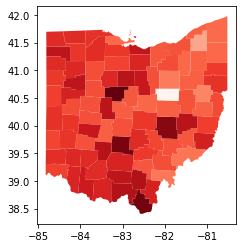

In [77]:
import geopandas as gpd
#load the Ohio county data
ohio_state = gpd.read_file('../sharedData/Ohio_COUNTY_SVI/SVI2018_OHIO_county.shp')
#merge this with the covid data CSV file using FIPS as the key
ohio_state_with_totals = ohio_state.merge(data,on='FIPS')
ohio_state_with_totals.plot(column='total_cases_per_population', cmap='Reds');

### Selection by Geography

#### Select using arbitrary shapes (free drawing)

For example, you want to select all the hospitals that are in the Columbus area. 

1. Click on the "Select Features by Area or Click"

![vector13](images/vector13.png)

2. Draw a rectangle around Columbus area.

![vector14](images/vector14.png)

3. The matching locations will be selected and will be highlighted in yellow

![vector15](images/vector15.png)

the corresponding changes will be reflected in the attribute table (315 records selected)

![vector16](images/vector16.png)

Similarly we can select by circles (use the radius option) as well as other shapes


If you want to download the selected features only, then right click on the layer and select Export and Save Selected Features As.

#### Select using other layers

In this example, we will see how two layers can be used for performing a spatial query. We will use Cleveland City boundaries to select the hospitals that lie with in Cleveland City.

1. Load the Cleveland City Boundaries data https://cwru.box.com/s/p1lfgqhw1xhi53tbo0e219pni8jk58j7

![vector17](images/vector17.png)

2. Click on the "Select By Location" button

![vector18](images/vector18.png)

3. For the select features "from" drop down select hospitals and select cleveland_city_boundaries for the other. For the predicate, select "are within".

So by this query we are saying select all records from hospital data that "are within" the Cleveland city boundaries

![vector19](images/vector19.png)

4. Click on Run and once its finished, click on Close. You will see that the hospitals within Cleveland city boundaries are selected

![vector20](images/vector20.png)


![vector21](images/vector21.png)


One more example before we delve into other spatial operations

In this example we select all the roads that pass through Cleveland City

1. Load the Ohio road dataset https://cwru.box.com/s/za1tj9l66l6qksqv7gwnrillkl7w0evl

![vector22](images/vector22.png)

2. Now use select location with roads as "from" source and Cleveland City Boundary as the other layer. For geometric predicate we have to select intersects

Now why do we have to select intersects than within???

![vector23](images/vector23.png)

3. We can see the roads that intersect with Cleveland boundaries are selected

![vector24](images/vector24.png)


![vector25](images/vector25.png)

## Overlay

Overlays or map overlays refers to a **group of procedures and techniques used in combining information from different data layers**. This is an **important capability of most GIS environments**. Map overlays **involve at least two input layers and result in at least one new output layer**.

Let's look at some overlay operations    

### Clipping

Clipping takes **one GIS layer (the clip feature) and another GIS layer (the to-be-clipped input feature)**. The **output is a clipped version of the original input layer**. The output **attributes table is a subset of the original attributes table where only records for the clipped polygons are preserved**.

Let's look at an example.

Clip and extract the roads that are passing through Cleveland City.

1. Load the Ohio Roads dataset and the Cleveland City Boundaries

![vector26](images/vector26.png)

2.Select Clip from Vector Geoprocessing tools

![vector27](images/vector27.png)

3. Select Ohio_roads as Input Layer and cleveland_city_boundaries as overlay layer

After you Run Clip you get a new layer called 'Clipped'

![vector28](images/vector28.png)

**Note:** When you run clip make sure that both the files are having the same coordinate reference system.

Lets try that in Python

<AxesSubplot:>

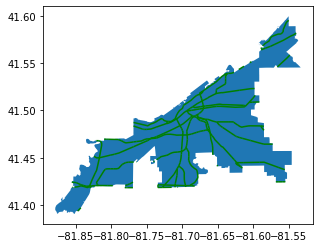

In [78]:
import geopandas as gpd
roads = gpd.read_file(r'../sharedData/Ohio_roads/Ohio_roads.shp')
clevelandCityBoundaries = gpd.read_file(r'../sharedData/cleveland_city_boundaries/cleveland_city_boundaries.shp')
clippedRoads = gpd.clip(roads,clevelandCityBoundaries)
ax = clevelandCityBoundaries.plot()
clippedRoads.plot(color='green',ax=ax)

### Point in Polygon Overlay

The point-in-polygon overlay operation requires a **point input layer and a polygon overlay layer**. Upon performing this operation, **a new output point layer is returned that includes all the points that occur within the spatial extent of the overlay**. In addition, all the points in the output layer **contain their original attribute information as well as the attribute information from the overlay**. 

So let's jump into an example. In this example we will assign SVI score to hospital based on the census tract in which its located (potential Ecological Fallacy!!!).

1. Download the Ohio SVI census tract data https://cwru.box.com/s/eskcdycjs5gmidzgi8b6wivt27x6tche and the Ohio hospital data from https://cwru.box.com/s/w6raygawlkllg0o42sile9iykiu39xid

2. Load the Ohio SVI census tract data and Ohio hospital data.

3. Select "Join Attributes by Location" from Data Management Tools in Vector

![vector29](images/vector29.png)

4. For the parameters select Ohio_hospitals as the option for "Join to features in" and SVI2018_OHIO_tract as "comparing to". Use within as the predicate. Click Run

![vector30](images/vector30.png)

5. A new layer called Join layer will be created wheer each record is a hospital, and it has additional attributes from the SVI2018_OHIO_tract table

![vector31](images/vector31.png)

You can further use this layer to find out which all hospitals are located in places with high social vulnerability (may be .8 and above) etc. 

Now let's try that in Python

In [79]:
import pandas as pd
import geopandas as gpd
hospitals = pd.read_csv(r'../sharedData/Hospitalsdata.csv',encoding_errors='ignore')
soviCounties = gpd.read_file('../sharedData/Ohio_COUNTY_SVI/SVI2018_OHIO_county.shp')
hospitalsGeo = gpd.GeoDataFrame(hospitals,geometry=gpd.points_from_xy(hospitals.LONGITUDE,hospitals.LATITUDE),crs='EPSG:4326')
newlayer = gpd.sjoin(hospitalsGeo,soviCounties)

C:\Users\jxa421\AppData\Local\Temp\ipykernel_43272\4005004150.py:6: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4326
Right CRS: EPSG:4269

  newlayer = gpd.sjoin(hospitalsGeo,soviCounties)


### Line in Polygon Overlay

The line-in-polygon overlay operation is similar to the point-in-polygon overlay, with that obvious exception that a line input layer is used instead of a point input layer. In this case, each line that has any part of its extent within the overlay polygon layer will be included in the output line layer, although these lines will be truncated at the boundary of the overlay.

### Polygon in Polygon Overlay

This is the most commonly used overlay operation. Using this method, the **polygon input and overlay layers are combined to create an output polygon layer with the extent of the overlay. The attribute table will contain spatial data and attribute information from both the input and overlay layers**.

Let's see an example. In this example we will use a sample set of parcels from the city of Cleveland and the SVI2018_OHIO_tract dataset. Finally we will assign SVI scores for each parcel

1. Download the dataset cleveland_sample_parcel from https://cwru.box.com/s/dnjsi8ifyc831or92jvw56dzk73r1jlw

2. Load cleveland_sample_parcel and SVI2018_OHIO_tract to QGIS https://cwru.box.com/s/eskcdycjs5gmidzgi8b6wivt27x6tche

3. Now open the "Join Attributes By Location" window and then fill in the following details

![vector32](images/vector32.png)

4. After running, check the attribute column for the new layer called Joined Layer. It will have the details from the SVI2018_OHIO_tract table. No we can assign SOVI scores for each parcel

![vector33](images/vector33.png)


And lets try that in Python 

In [80]:
import geopandas as gpd
parcelData = gpd.read_file('../sharedData/cleveland_sample_parcel/cleveland_sample_parcel.shp')
svi_tract = gpd.read_file('../sharedData/Ohio_SVI_Census_Tracts/SVI2018_OHIO_tract.shp')
joined = gpd.sjoin(parcelData,svi_tract)

C:\Users\jxa421\AppData\Local\Temp\ipykernel_43272\2240571300.py:4: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4326
Right CRS: EPSG:4269

  joined = gpd.sjoin(parcelData,svi_tract)


## Few other Vector Operations

### Buffer

Buffers are common vector analysis tools used to address questions of proximity in a GIS and can be used on points, lines, or polygons. It can be used to answer spatial questions like
How many houses are there with in 5 km radius of a factory, or a runoff site. 

Let's look at an example. For this example we will use the cholera deaths dataset and the pump dataset. https://cwru.box.com/s/wcezjkzyri77suujdby65fhcgx5qmvr3

1. Load both the datasets to QGIS

2. Create a buffer of 100m for the pumps

Select buffer from Geoprocessing Tools for Vector

![vector34](images/vector34.png)

Select Pumps as input layer and 100 meter as buffer distance

![vector35](images/vector35.png)

A new polygon layer called Buffered will be created. You can rename the layer by right clicking on it and selecting Rename Layer.

![vector36](images/vector36.png)

3. Now use select by location option with Cholera_Deaths as the "from" layer and Buffered as the other layer. Use are within predicate.

![vector37](images/vector37.png)

After the process we can see the selected locations of cholera deaths that are within 100 meter of any pump.


![vector38](images/vector38.png)

**Note** For using buffer operation its best to have the layer in projected coordinate system.

Now let's try buffering in Python

In [81]:
import geopandas as gpd
deathLocations = gpd.read_file(r'../sharedData/SnowGIS_SHP/SnowGIS_SHP/SnowGIS_SHP/Cholera_Deaths.shp')
pumps = gpd.read_file(r'../sharedData/SnowGIS_SHP/SnowGIS_SHP/SnowGIS_SHP/Pumps.shp')
pumpBuffers = gpd.GeoDataFrame(geometry=pumps.buffer(100))
deathLocation100meter = gpd.sjoin(deathLocations,pumpBuffers,predicate='within')

Now what if we want to count how many locations of cholera death with in 500 meter of each pump? For this we use a technique called "Point in Polygon Count" which we are going to look in the next section.

### Point in Polygon Count

When you have a polygon layer and a point layer - and want to know how many or which of the points fall within the bounds of each polygon, you can use this method of analysis.

Here we will use the cholera and pump dataset. We will try to answer the question we have asked in the last section

1. Load the cholera death and pump dataset to QGIS

2. Create buffer for pump as previously done.

3. Select "Count Points in Polygon" from Analysis Tools in Vector

![vector39](images/vector39.png)

4. Select buffered as Polygons and Cholera_deaths as Points and then click on RUN.

![vector40](images/vector40.png)

5. The attribute table for the output "Count" will have the pumps along with the counts. 

![vector41](images/vector41.png)

Now let's look at a more involved example. Here we will generate a choropleth map for number of hospitals in Ohio counties.

1. Load the Ohio hospital and SVI2018_OHIO_county data

2. Run "Count Points in Polygon" with SVI2018_OHIO_county as Polygon and Ohio_hospitals as points.

3. The new layer Count will have the counties with the additional NUMPOINTS column.

4. Right click on the layer, select symbology, and type as Graduated and select value as NUMPOINTS. Choose a color ramp and use Equal Interval as mode with 5 classes.

Voilaaa!!! You have a new choropleth map indicating the spatial distribution of hospitals. 

![vector42](images/vector42.png)


Now can you repeat it with Census Tracts for Ohio?

Let's try point in Polygon for the pump data in Python

In [82]:
import geopandas as gpd
deathLocations = gpd.read_file(r'../sharedData/SnowGIS_SHP/SnowGIS_SHP/SnowGIS_SHP/Cholera_Deaths.shp')
pumps = gpd.read_file(r'../sharedData/SnowGIS_SHP/SnowGIS_SHP/SnowGIS_SHP/Pumps.shp')
pumpBuffers = gpd.GeoDataFrame(geometry=pumps.buffer(100))
deathLocation100meter = gpd.sjoin(deathLocations,pumpBuffers,predicate='within')
deathLocation100meterTotals = deathLocation100meter[['index_right']].value_counts().reset_index()
deathLocation100meterTotals.columns=['pumpnumber','count']

In this chapter we looked at commonly used Vector operations. There are many more (Union, Intersection, Delaunay  Triangulation, Voronoi Polygons) and I would strongly urge you to look at them. In the next chapter we will look into raster operations.